# Introducción al Análisis de Datos con SQL y Python

Este notebook es un **tutorial práctico** para introducir conceptos clave del análisis de datos, integrando SQL y Python.

Temas que abordaremos:
- Tipos y estructura de datos
- Etapas del ciclo de vida de los datos
- Las seis fases del análisis de datos
- Técnicas y Herramientas para análisis de datos
- Transformación y extracción de datos con SQL
- Datos sesgados e imparciales
- Importancia de la integridad de los datos
- Tamaño de la muestra y confiabilidad
- Técnicas de limpieza, importación, ordenación
- Visualización de datos en Python


##   Tipos y Estructura de Datos
- **Numéricos**: enteros, decimales.
- **Categóricos**: etiquetas, clasificaciones.
- **Texto**: cadenas largas (ej. reseñas).
- **Tiempo/Fechas**: timestamps.
- **Estructurados**: tablas, bases SQL.
- **No estructurados**: imágenes, audio, texto libre.

In [1]:
import pandas as pd

data = pd.DataFrame({
    'ID': [1,2,3],
    'Nombre': ['Ana','Luis','Marta'],
    'Edad': [23, 35, 29],
    'Fecha_registro': pd.to_datetime(['2021-01-01','2021-03-15','2021-07-30'])
})
data

,ID,Nombre,Edad,Fecha_registro
0,1,Ana,23,2021-01-01
1,2,Luis,35,2021-03-15
2,3,Marta,29,2021-07-30


##   Etapas del Ciclo de Vida de los Datos
1. **Generación/Obtención**
2. **Almacenamiento**
3. **Procesamiento**
4. **Análisis**
5. **Visualización/Comunicación**
6. **Toma de decisiones**

##   Las Seis Fases del Análisis de Datos
1. Definición de objetivos.
2. Recolección de datos.
3. Limpieza y preparación.
4. Análisis exploratorio.
5. Modelado.
6. Comunicación de resultados.

##   Herramientas para Análisis de Datos
- **SQL**: extracción y transformación.
- **Python (pandas, numpy)**: análisis y manipulación.
- **Matplotlib / Seaborn**: visualización.
- **Scikit-learn**: modelado y machine learning.

##   Transformación de Datos con SQL
Ejemplo usando **SQLite en memoria**.

In [2]:
import sqlite3

# Crear base de datos en memoria
conn = sqlite3.connect(':memory:')
cur = conn.cursor()

# Crear tabla
cur.execute('''CREATE TABLE clientes (
               id INTEGER, nombre TEXT, edad INTEGER, gasto REAL)''')

cur.executemany('INSERT INTO clientes VALUES (?,?,?,?)', [
    (1,'Ana',23,120.5),
    (2,'Luis',35,80.0),
    (3,'Marta',29,150.75)
])
conn.commit()

# Query
pd.read_sql_query("SELECT * FROM clientes WHERE gasto > 100", conn)

,id,nombre,edad,gasto
0,1,Ana,23,120.50
1,3,Marta,29,150.75


##   Datos Sesgados e Imparciales
- **Sesgo**: cuando los datos no representan a toda la población.
- Ejemplo: encuesta solo en una ciudad pequeña para representar a todo un país.
- **Datos imparciales**: muestra balanceada y representativa.

##   Importancia de la Integridad de los Datos
- Evitar duplicados.
- Mantener consistencia en formatos.
- Validar registros incompletos.

##   Tamaño de la Muestra y Confiabilidad
- Tamaño insuficiente → baja confiabilidad.
- Tamaño excesivo → costo alto.
- Se evalúa con métricas estadísticas (error estándar, intervalos de confianza).

##   Técnicas de Limpieza de Datos
- Eliminar duplicados.
- Imputación de valores faltantes.
- Normalización y estandarización.

In [3]:
df = pd.DataFrame({
    'Nombre': ['Ana','Luis','Luis','Marta'],
    'Edad': [23,35,None,29],
    'Gasto': [120.5,80.0,80.0,None]
})
print('Antes de limpieza:\n', df)

# Eliminar duplicados
df = df.drop_duplicates()

# Imputar valores faltantes
df['Edad'] = df['Edad'].fillna(df['Edad'].mean())
df['Gasto'] = df['Gasto'].fillna(df['Gasto'].mean())

print('\nDespués de limpieza:\n', df)

Antes de limpieza:
   Nombre  Edad  Gasto
0    Ana  23.0  120.5
1   Luis  35.0   80.0
2   Luis   NaN   80.0
3  Marta  29.0    NaN

Después de limpieza:
   Nombre  Edad  Gasto
0    Ana  23.0  120.5
1   Luis  35.0   80.0
2   Luis  29.0   80.0
3  Marta  29.0   93.5


##   Ordenación de Datos

In [4]:
df.sort_values(by='Gasto', ascending=False)

,Nombre,Edad,Gasto
0,Ana,23.0,120.5
3,Marta,29.0,93.5
1,Luis,35.0,80.0
2,Luis,29.0,80.0


##   Extracción de Datos con SQL

In [5]:
pd.read_sql_query("SELECT nombre, gasto FROM clientes ORDER BY gasto DESC", conn)

,nombre,gasto
0,Marta,150.75
1,Ana,120.50
2,Luis,80.00


##   Visualización de Datos

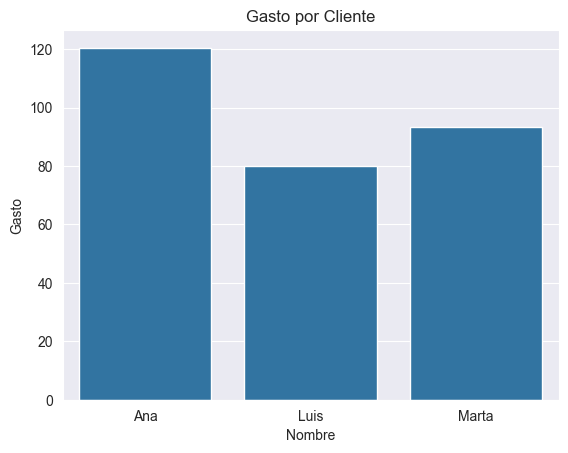

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Nombre', y='Gasto', data=df)
plt.title('Gasto por Cliente')
plt.show()